<font color='blue'>Привет! Поздравляю со вторым выполненным проектом. Он значительно объемнее первого. Меня зову Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда желательно доработать)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.

---
Апдейт после проверки: очень сильная работа, у меня не столько замечания, сколько доп. задания.  
Более подробно см. блок в конце.
</font>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt
import calendar

In [5]:
# Считаем данные из датасета, проверим корректность выгрузки
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv')
real_estate_data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что данные выгрузились некорректно. Это произошло, потому что данные разделены знаком табуляции `\t`. Выгрузим данные еще раз, передав этот символ в качества параметра *sep*. 

In [6]:
# Считаем данные из датасета, проверим корректность выгрузки
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate_data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
# Сделаем так, чтобы отображались все столбцы, и проверим результат
pd.set_option('display.max_columns', None) 
real_estate_data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Всего в таблице 22 столбцов. Они содержат следующую информацию:  
* **total_images** — число фотографий квартиры в объявлении  
* **last_price** — цена на момент снятия с публикации
* **total_area** — площадь квартиры в квадратных метрах (м²)
* **first_day_exposition** — дата публикации
* **rooms** — число комнат
* **ceiling_height** — высота потолков (м)
* **floors_total** — всего этажей в доме
* **living_area** — жилая площадь в квадратных метрах(м²)
* **floor** — этаж
* **is_apartment** — апартаменты (булев тип)
* **open_plan** — свободная планировка (булев тип)
* **studio** — квартира-студия (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **balcony** — число балконов
* **locality_name** — название населённого пункта
* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
* **cityCenters_nearest** — расстояние до центра города (м)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

In [8]:
# Расмотрим общую информацию о данных
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [9]:
# Расмотрим сводную информацию о данных
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
# Проверим данные на дубликаты
real_estate_data.duplicated().sum()

0

### Вывод  
Предварительный взгляд на датасет дает нам информацию о следующих проблемах:
* Количество значений в столбцах различается. Это говорит о том, что в данных есть нулевые значения.
* Столбец *last_price* имеет вещественынй тип, хотя тут будет достаточно целочисленного. Кроме того, большое количество нулей затрудняет восприятие информации. Целесообразно привести цену из руб. в млн. руб.
* Столбец *first_day_exposition* необходимо приевести к временному типу.
* Столбец *floors_total* имеет цещественный тип.
* Столбец *is_apartment* необходимо привести к булевому типу. В этом слобце очень много пропусков, скорее всего это вызвано тем, что люди при выставлении объявлений на обычные квартиры (не апартаменты) просто не проставляли этот пункт. Логично предположить, что пропуск подразумевает, что это не апартаменты, то есть ячейка принимает значения False.
* Столбец *balcony* имеет цещественный тип. В этом слобце очень много пропусков. Скорее всего это вызвано тем, что если человек не указал число балконов, то скорее всего, их просто нет. Такие пропуски правильно заменить на 0. 
* Столбцы *parks_nearest*, *parks_around3000*, *ponds_nearest* и *ponds_around3000* имеют очень много пропусков. Скорее всего это вызвано тем, что прудов или парков рядом с квартирой из объявления нету.

<font color='green'>Данные загружены и довольно подробно изучены. Применены методы первичного анализа.</font>

## Шаг 2. Предобработка данных

### Обработка пропусков, замена типа данных и обработка некорректных значений

Пойдем по датасету слева направо, разбираясь с каждым столбцом отдельно.

In [11]:
# Поделим на миллион цены из столбца last_price, переименуем его и проверим результат
real_estate_data['last_price'] = round( real_estate_data['last_price'] / 10**6, 3)
real_estate_data.rename(columns={'last_price':'price_in_million'}, inplace=True)
real_estate_data['price_in_million'].head()

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
Name: price_in_million, dtype: float64

In [12]:
# Приведем столбец first_day_exposition к временному типу, переименуем его и проверим результат
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
real_estate_data.rename(columns={'first_day_exposition':'exposition_date'}, inplace=True)
real_estate_data['exposition_date'].dtype

dtype('<M8[ns]')

В столбце *rooms* можно заметить, что min=0, a max=19. Проверим строки с этими значениями.

In [13]:
# Выведем максимальное значение в столбце rooms 
real_estate_data.query('rooms == 19')

,total_images,price_in_million,total_area,exposition_date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32.25,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [14]:
# Узнаем количество минимальных значений в столбце rooms, также узнаем сколько студий и апартаментов, среди таких квартир.
print ("Общее количество квартир, где указано 0 комнат: {: >10}".format( len(real_estate_data.query('rooms == 0')['rooms'])) )
print ("Количество студий, где указано 0 комнат: {: >17}".format( len(real_estate_data.query('rooms == 0 and studio == True')['rooms'])) )
print ("Количество апартаментов, где указано 0 комнат: {: >10}".format( len(real_estate_data.query('rooms == 0 and is_apartment == True')['rooms'])) )

Общее количество квартир, где указано 0 комнат:        197
Количество студий, где указано 0 комнат:               138
Количество апартаментов, где указано 0 комнат:          0


Скорее всего 19 комнат находятся в дорогом особняке, так как цена и площади соответствуют количеству комнат. Большая часть "нулевых" комнат обусловлена тем, что это квартиры-студии. Остальная часть может быть вызвана как тем, что пользователи неправильно заполнили данные, так и тем, что произошла ошибка при выгрузке данных (к примеру, возникли нулевые значения в столбце *is_apartment*).

In [15]:
# Выведем Самые высокие потолки и их количество из столбца ceiling_height
real_estate_data['ceiling_height'].value_counts().sort_index(ascending=False).head(15)

100.0    1
32.0     2
27.5     1
27.0     8
26.0     1
25.0     7
24.0     1
22.6     1
20.0     1
14.0     1
10.3     1
8.3      1
8.0      3
6.0      1
5.8      1
Name: ceiling_height, dtype: int64

Согласно [данным источника](https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011) потолки около 4 метров уже считаются необычайно высокими. Все значения выше являются артефактами. Их появление может быть обусловлено ошибкой выгрузки данных или ошибкой при вводе данных пользователем.

In [16]:
# Посчитаем количество и долю квартир с потолками свыше 4 метров
ceiling_more_than_four = len( real_estate_data.query('ceiling_height > 4') )
ceiling_more_than_four_rate = ceiling_more_than_four / real_estate_data.shape[0]  * 100

print ("Количество объявлений, где потолки выше 4 метров: {: >5}".format(ceiling_more_than_four))
print ("Доля объявлений, где потолки выше 4 метров: {: >10}%".format( round(ceiling_more_than_four_rate, 2)) )

Количество объявлений, где потолки выше 4 метров:    75
Доля объявлений, где потолки выше 4 метров:       0.32%


Видим, что и в абсолютном и в относительном значениях доля таких объявлений мала, поэтому их можно удалить или заменить на среднее без потери точности всех данных.

In [17]:
# Проверим, сколько пропущенных знаечний в столбце ceiling_height
real_estate_data['ceiling_height'].isna().sum()

9195

Пропущенные значения можно заполнить средним, так как все значения лежат в одном небольшом диапазоне. Также можно заполнить высоту потолков медианным значением в соответствии с этажностью, так как у пятиэтажек, девятиэтажек и т.д. высота потолков 
должна быть примерно одинкова (как минимум из-за ГОСТов).  
Заполним пропуски и выбросы вторым способом. Для избежания ошибок, перед обработкой пропусков в столбце *ceiling_height*, сначала избавимся от пропусков в столбце *floors_total*.

In [18]:
# Узнаем количество пропусков в столбце floors_total
real_estate_data['floors_total'].isna().sum()

86

Среднее, медиана и мода не подходят для заполнения пропусков, так как во-первых, количество этажей - это целое дискретное значение; а во-вторых, этаж проживания после замены может быть выше полученного значения общего количества этажей; в-третьих, общее количество этажей - это величина, манипуляция которой может привести к сильному искажению данных. Поэтому эти пропуски проще удалить.

In [19]:
# Удалим строки с пропусками и проверим результат
real_estate_data.dropna(subset = ['floors_total'], inplace = True)
real_estate_data['floors_total'].isna().sum()

0

In [20]:
# Сгруппируем данные и проверим результат
ceiling_grouped = (real_estate_data
 .query('ceiling_height <= 4')
 .groupby('floors_total')
 .agg({'ceiling_height': ['median']})
 .sort_values('floors_total')
)
ceiling_grouped.columns = ['median_ceiling_height']
ceiling_grouped

,median_ceiling_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


In [21]:
# Напишем вспомогательную функцию для заполнения
def ceiling_fill(data):
    if ((data['floors_total'] in (ceiling_grouped.index)) 
        & 
        (np.isnan(data['ceiling_height']) | (data['ceiling_height'] > 4)) 
       ):         
        return ceiling_grouped['median_ceiling_height'][data['floors_total']]
    else:
        return data['ceiling_height']

In [22]:
# Обработаем столбец и проверим резльутат
real_estate_data['ceiling_height'] = real_estate_data.apply(ceiling_fill, axis = 1)

print("Количество строк, где значение больше 4:", len( real_estate_data.query('ceiling_height > 4') ))
print("Количество пропусков:", real_estate_data['ceiling_height'].isna().sum())

Количество строк, где значение больше 4: 0
Количество пропусков: 1


In [23]:
# Проверим, откуда взялся необработанный пропуск
real_estate_data.query('ceiling_height.isna()')

,total_images,price_in_million,total_area,exposition_date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9.9,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


При группировке данных, из-за того, что ceiling_height = 0, данная строка не попала в сгруппированные данные. Так как в датасете больше нет 33 эатжынх домов, то заполним пропуск медианным значением по всему столбцу.

In [24]:
# Проверим, откуда взялся необработанный пропуск
real_estate_data['ceiling_height'].fillna(real_estate_data['ceiling_height'].median(), inplace=True)
real_estate_data['ceiling_height'].isna().sum()

0

<S><font color='blue'>Можно было также заменить эти значения ("ceiling_height") на средние, раз уж мы все расно это делаем ниже.

<S><font color=blue>А можно и удалить ("floors_total") - много не теряем, а данные будут почище.

<S><font color=brown>Можно пойти немного дальше и заполнить высоту потолков медианами в соответствии с этажностью. Ведь у пятиэтажек, девятиэтажек и т.д. высота потолков должна быть более-менее одинкова.

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил все три замечания

In [25]:
# Узнаем количество пропусков в столбце living_area
real_estate_data['living_area'].isna().sum()

1870

Пропусков довольно много. Заполним их следующим образом: сперва посчитаем среднее отношение жилой площади к общей площади. После этого мы сможем восстановить жилую площадь, умножив общую площадь на этот коэффициент.

In [26]:
# Посчитаем коэфициент отношения площади кухни к общей
living_to_total_ratio = round((real_estate_data['living_area'] /  real_estate_data['total_area']).mean(), 2)
living_to_total_ratio

0.56

In [27]:
# Напишем вспомогательную функцию для заполнения
def living_fill(data):
    if np.isnan(data['living_area']):
        return data['total_area'] * living_to_total_ratio
    else:
        return data['living_area']

In [28]:
# Обработаем столбец и проверим резльутат
real_estate_data['living_area'] = real_estate_data.apply(living_fill, axis = 1)
print("Количество пропусков:", real_estate_data['living_area'].isna().sum())

Количество пропусков: 0


In [29]:
# Заполним пропуски столбца is_apartment значением False, приведем тип столбца к булевому типу, проверим результат
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(value=False)
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')

print ('Тип стоблца "is_apartment":', real_estate_data['is_apartment'].dtype )
print ('Количество пропусков в столбце "is_apartment":', real_estate_data['is_apartment'].isna().sum() )

Тип стоблца "is_apartment": bool
Количество пропусков в столбце "is_apartment": 0


In [30]:
# Узнаем количество пропусков в столбце kitchen_area
real_estate_data['kitchen_area'].isna().sum()

2231

Пропусков много. Обработаем их так же, как и в случае с living_area.

In [31]:
# Посчитаем коэфициент отношения площади кухни к общей
kitchen_to_total_ratio = round((real_estate_data['kitchen_area'] /  real_estate_data['total_area']).mean(), 2)
kitchen_to_total_ratio

0.19

In [32]:
# Напишем вспомогательную функцию для заполнения
def  kitchen_fill(data):
    if np.isnan(data['kitchen_area']):
        return data['total_area'] * kitchen_to_total_ratio
    else:
        return data['kitchen_area']

In [33]:
# Обработаем столбец и проверим резльутат
real_estate_data['kitchen_area'] = real_estate_data.apply(kitchen_fill, axis = 1)
print("Количество пропусков:", real_estate_data['kitchen_area'].isna().sum())

Количество пропусков: 0


<S><font color='brown'>Могу предложить заполнить пропуски в площади кухни более оптимальным образом: сперва посчитать среднее отношение площади кухни к общей площади. После этого мы сможем восстановить площадь кухни, умножив общую площадь на этот коэффициент. То же самое относится к жилой площади. 

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил для обоих столбцов.

<b>UPD <font color=green>Отлично, теперь пропуски заполнены максимально достоверно.

In [34]:
# Заполним пропуски столбца balcony значением 0, приведем тип столбца к целочисленному типу, проверим результат
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(value=0)
real_estate_data['balcony'] = real_estate_data['balcony'].astype('int')

print ('Тип стоблца "balcony":', real_estate_data['balcony'].dtype )
print ('Количество пропусков в столбце "balcony":', real_estate_data['balcony'].isna().sum() )

Тип стоблца "balcony": int64
Количество пропусков в столбце "balcony": 0


В столбцах *airports_nearest* и *cityCenters_nearest* очень много пропусков. Это может быть вызвано тем, что населенный пункт может быть далеко расположен от Санкт-Петербурга и от единсвтенного крупного аэропорта (Пулково) соотвественно. Проверим эту гипотезу.

In [35]:
# Сгруппируем данные по насленным пунктам, где есть информация про аэропорт, и сформируем список населенных пунктов
air_index_list = real_estate_data.query('airports_nearest.notnull()')['locality_name'].value_counts().index.sort_values()
air_index_list

Index(['Зеленогорск', 'Колпино', 'Красное Село', 'Кронштадт', 'Ломоносов',
       'Павловск', 'Петергоф', 'Пушкин', 'Санкт-Петербург', 'Сестрорецк',
       'поселок Лисий Нос', 'посёлок Александровская', 'посёлок Белоостров',
       'посёлок Левашово', 'посёлок Лисий Нос', 'посёлок Металлострой',
       'посёлок Молодёжное', 'посёлок Парголово', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Понтонный', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Стрельна', 'посёлок Усть-Ижора',
       'посёлок Шушары'],
      dtype='object')

In [36]:
# Сгруппируем данные по насленным пунктам, где есть информация про расстояние до центра, и сформируем список населенных пунктов
center_index_list = real_estate_data.query('cityCenters_nearest.notnull()')['locality_name'].value_counts().index.sort_values()
center_index_list

Index(['Зеленогорск', 'Колпино', 'Красное Село', 'Кронштадт', 'Ломоносов',
       'Павловск', 'Петергоф', 'Пушкин', 'Санкт-Петербург', 'Сестрорецк',
       'поселок Лисий Нос', 'посёлок Александровская', 'посёлок Белоостров',
       'посёлок Левашово', 'посёлок Лисий Нос', 'посёлок Металлострой',
       'посёлок Молодёжное', 'посёлок Парголово', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Понтонный', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Стрельна', 'посёлок Усть-Ижора',
       'посёлок Шушары'],
      dtype='object')

In [37]:
# Сравним эти два списка
air_index_list.equals(center_index_list)

True

Видим, что списки идентичны. Это говорит о том, что информация о расстоянии до центра и до аэропорта имеется только в тех объявлениях, населенные пункты которых находятся в непосредсвтенной близости от Санкт-Петербурга. пользуясь этим фактом можно заполнить часть пропусков. Если населенный пункт входит в это подмножество, но в строке отсутствует информация о расстоянии, то пропуск можно заполнить медианным растоянием от этого населенного пукнта до объекта.

In [38]:
# Сделаем сводную таблицу по ближайшим населенным пунктам с выводом медианы
locality_info = pd.pivot_table(
    real_estate_data.query('airports_nearest.notnull() and cityCenters_nearest.notnull()'),
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'], aggfunc='median')
locality_info

,airports_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25723.5,29148.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15776.5,27930.5
Санкт-Петербург,26763.0,12243.0


In [39]:
# Сделаем вспомогательную функцию для заполнения пропусков в столбце airports_nearest
def air_null_fill(data):
    if ( data['locality_name'] in (locality_info.index) ) & ( np.isnan(data['airports_nearest']) ):        
        return locality_info['airports_nearest'][data['locality_name']]
    else:
        return data['airports_nearest']

In [40]:
# Проверим количество пропусков в столбце airports_nearest
real_estate_data['airports_nearest'].isna().sum()

5532

In [41]:
# Заполним пропуски и проверим результат
real_estate_data['airports_nearest'] = real_estate_data.apply(air_null_fill, axis = 1)
real_estate_data['airports_nearest'].isna().sum()

5440

In [42]:
# Сделаем вспомогательную функцию для заполнения пропусков в столбце cityCenters_nearest
def centers_null_fill(data):
    if ( data['locality_name'] in (locality_info.index) ) & ( np.isnan(data['cityCenters_nearest']) ):        
        return locality_info['cityCenters_nearest'][data['locality_name']]
    else:
        return data['cityCenters_nearest']

In [43]:
# Проверим количество пропусков в столбце cityCenters_nearest

real_estate_data['cityCenters_nearest'].isna().sum()

5509

In [44]:
# Заполним пропуски и проверим результат
real_estate_data['cityCenters_nearest'] = real_estate_data.apply(centers_null_fill, axis = 1)
real_estate_data['cityCenters_nearest'].isna().sum()

5440

К сожалению, в обоих столбцах заполнилось не так много пропусков, как хотелось бы. Остальные пропуски трогать не будем.

<font color=green>Действительно, к сожалению, много пропусков таким образом заполнить не удалось, но те, что заполнили - заполнили качественно.

In [45]:
# Заполним пропуски столбца parks_around3000 значением 0, приведем тип столбца к целочисленному типу, проверим результат
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].fillna(value=0)
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].astype('int')

print ('Тип стоблца "parks_around3000":', real_estate_data['parks_around3000'].dtype )
print ('Количество пропусков в столбце "parks_around3000":', real_estate_data['parks_around3000'].isna().sum() )

Тип стоблца "parks_around3000": int64
Количество пропусков в столбце "parks_around3000": 0


In [46]:
# Заполним пропуски столбца ponds_around3000 значением 0, приведем тип столбца к целочисленному типу, проверим результат
real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].fillna(value=0)
real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].astype('int')

print ('Тип стоблца "ponds_around3000":', real_estate_data['ponds_around3000'].dtype )
print ('Количество пропусков в столбце "ponds_around3000":', real_estate_data['ponds_around3000'].isna().sum() )

Тип стоблца "ponds_around3000": int64
Количество пропусков в столбце "ponds_around3000": 0


Пропусков в столбцах parks_nearest и ponds_nearest слишком много. Как уже было сказано выше, скорее всего это вызвано тем, что парков рядом просто нет. Проверим эту гипотезу.

In [47]:
# Проверим, есть ли парки там, где есть пропуски в столбце parks_nearest
print ('Количество пропусков в столбце "parks_nearest":',
       real_estate_data['parks_nearest'].isna().sum() )
print ('Количество пропусков в столбце "parks_nearest", где "parks_around3000" равен 0:', 
       real_estate_data.query('parks_nearest.isna() and parks_around3000 == 0').shape[0] )

Количество пропусков в столбце "parks_nearest": 15568
Количество пропусков в столбце "parks_nearest", где "parks_around3000" равен 0: 15568


In [48]:
# Проверим, есть ли пруды там, где есть пропуски в столбце ponds_nearest
print ('Количество пропусков в столбце "ponds_nearest":', real_estate_data['ponds_nearest'].isna().sum())
print ('Количество пропусков в столбце "ponds_nearest", где "parks_around3000" равен 0:', 
       real_estate_data.query('ponds_nearest.isna() and ponds_around3000 == 0').shape[0])

Количество пропусков в столбце "ponds_nearest": 14552
Количество пропусков в столбце "ponds_nearest", где "parks_around3000" равен 0: 14552


Гипотеза оказалась верной. Пропуски можно было бы заполнить каким либо выбивающимся значением, к примеру -1 или *np.inf*. Однако, учитывая количество пропусков, это слишком сильно исказит данные. поэтому в обоих столбцах пропуски не трогаем.

<font color=green>Все верно, нам еще коэффифициенты корреляции считать, -1 в столбцах нам ни к чему.

Пропуски в столбце *days_exposition* также не будем трогать, так как эти данные сильно зависят от всех остальных значений в строке. Можно построить регрессионную модель, которая по всем остальным столбцам пресдказывала бы время продажи квартиры. Иными словами, эту переменную можно назвать целевой, и поэтому ее значениями нельзя манипулировать.

<font color=green>К тому же, скорее всего, пропуск в данном столбце означает то, что объявление еще не закрыто и его заполнение только удалит имеющиеся данные.

### Обработка выбросов 

Проверим данные на выбросы.

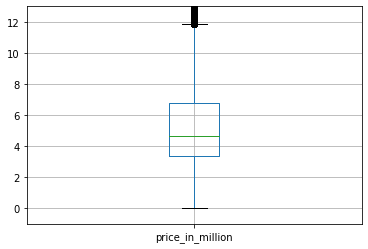

In [49]:
# Построим boxplot диаграмму для price_in_million
plt.ylim(-1, 13)
real_estate_data.boxplot('price_in_million')

Большая часть значений лежит в диапазоне до 7.5 миллионов. Все, что лежит выше 12 можно считать выбросами. Избавимся от них.

In [50]:
len(real_estate_data.query('price_in_million > 12')) 

1931

In [51]:
real_estate_data.drop(real_estate_data.query('price_in_million > 12').index,inplace=True)
len(real_estate_data.query('price_in_million > 12'))

0

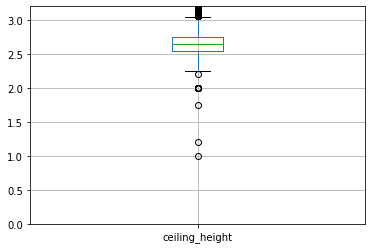

In [52]:
# Построим boxplot диаграмму для ceiling_height
plt.ylim(0, 3.2)
real_estate_data.boxplot('ceiling_height')

Большая часть значений лежит в диапазоне от 2.5 до 3 метров. Все, что лежит вне диапазона можно считать выбросами. 

In [53]:
len(real_estate_data.query('ceiling_height > 3 or ceiling_height < 2.25'))

931

In [54]:
real_estate_data.drop(real_estate_data.query('ceiling_height > 3 or ceiling_height < 2.25').index,inplace=True)
len(real_estate_data.query('ceiling_height > 3 or ceiling_height < 2.25'))

0

Аналогичным образом обратботаем остальные столбцы с выбивающимися данными.

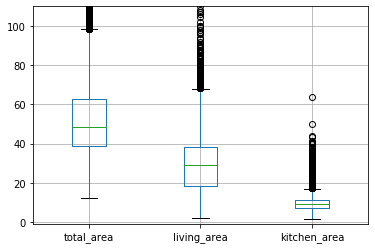

In [55]:
# Построим boxplot диаграмму для 'total_area', 'living_area', 'kitchen_area'
plt.ylim(-1, 110)
real_estate_data.boxplot(['total_area', 'living_area', 'kitchen_area']) 

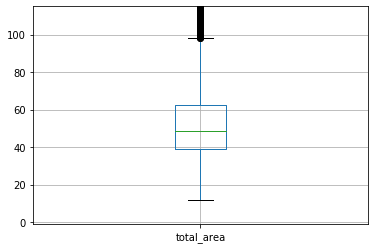

In [56]:
plt.ylim(-1, 115)
real_estate_data.boxplot(['total_area']) 

In [57]:
len(real_estate_data.query('total_area > 115'))

135

"""# уберем выбросы и проверим результат
price_median = round(real_estate_data.query('price_in_million <= 12')['price_in_million'].median(),2)
real_estate_data['price_in_million'] = (real_estate_data['price_in_million']
                                        .where(real_estate_data['price_in_million'] <= 12, price_median))
len(real_estate_data.query('price_in_million > 12'))"""


"""# уберем выбросы и проверим результат
median = round(real_estate_data.query('ceiling_height <= 3 and ceiling_height >= 2.25')['ceiling_height'].median(), 2)
real_estate_data['ceiling_height'] = (real_estate_data['ceiling_height']
                                        .where(real_estate_data['ceiling_height'] <= 3, median) 
                                     )
real_estate_data['ceiling_height'] = (real_estate_data['ceiling_height']
                                        .where(real_estate_data['ceiling_height'] >= 2.25, median) 
                                     )
len(real_estate_data.query('ceiling_height > 3 or ceiling_height < 2.25'))"""


"""# уберем выбросы и проверим результат для total_area
total_area_median = round(real_estate_data.query('total_area <= 115')['total_area'].median(), 2)
real_estate_data['total_area'] = (real_estate_data['total_area']
                                        .where(real_estate_data['total_area'] <= 115, total_area_median) 
                                     )
len(real_estate_data.query('total_area > 115'))
"""

"""# уберем выбросы и проверим результат для living_area
total_area_median = round(real_estate_data.query('living_area <= 77')['living_area'].median(), 2)
real_estate_data['living_area'] = (real_estate_data['living_area']
                                        .where(real_estate_data['living_area'] <= 77, total_area_median) 
                                     )
len(real_estate_data.query('living_area > 77'))
"""

"""# уберем выбросы и проверим результат для kitchen_area
total_area_median = round(real_estate_data.query('kitchen_area <= 20')['kitchen_area'].median(), 2)
real_estate_data['kitchen_area'] = (real_estate_data['kitchen_area']
                                        .where(real_estate_data['kitchen_area'] <= 20, total_area_median) 
                                     )
len(real_estate_data.query('kitchen_area > 20'))
"""

"""# уберем выбросы и проверим результат для airports_nearest
median = round(real_estate_data.query('airports_nearest <= 65000')['airports_nearest'].median(), 2)
real_estate_data['airports_nearest'] = (real_estate_data['airports_nearest']
                                        .where(real_estate_data['airports_nearest'] <= 65000, median) 
                                     )
len(real_estate_data.query('airports_nearest > 65000'))
"""

"""
"""

"""
"""

"""
"""

In [58]:
# уберем выбросы и проверим результат для total_area
real_estate_data.drop(real_estate_data.query('total_area > 115').index,inplace=True)
len(real_estate_data.query('total_area > 115'))

0

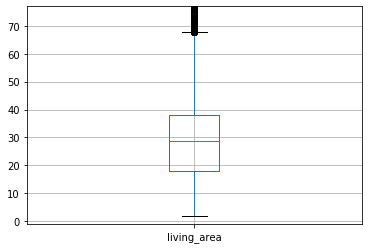

In [59]:
plt.ylim(-1, 77)
real_estate_data.boxplot(['living_area']) 

In [60]:
len(real_estate_data.query('living_area > 77'))

19

In [61]:
# уберем выбросы и проверим результат для living_area
real_estate_data.drop(real_estate_data.query('living_area > 77').index,inplace=True)
len(real_estate_data.query('living_area > 77'))

0

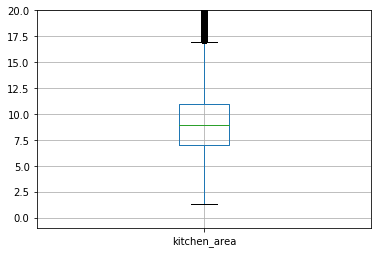

In [62]:
plt.ylim(-1, 20)
real_estate_data.boxplot(['kitchen_area']) 

In [63]:
len(real_estate_data.query('kitchen_area > 20'))

330

In [64]:
# уберем выбросы и проверим результат для kitchen_area
real_estate_data.drop(real_estate_data.query('kitchen_area > 20').index,inplace=True)
len(real_estate_data.query('kitchen_area > 20'))

0

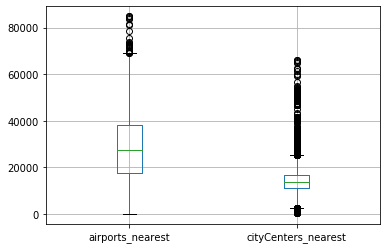

In [65]:
# Построим boxplot диаграмму для 'airports_nearest', 'cityCenters_nearest' 
real_estate_data.boxplot(['airports_nearest','cityCenters_nearest'])

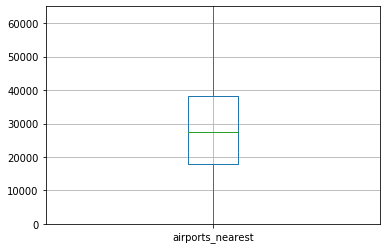

In [66]:
plt.ylim(-1, 65000)
real_estate_data.boxplot(['airports_nearest']) 

In [67]:
len(real_estate_data.query('airports_nearest > 65000'))

106

In [68]:
# уберем выбросы и проверим результат для airports_nearest
real_estate_data.drop(real_estate_data.query('airports_nearest > 65000').index,inplace=True)
len(real_estate_data.query('airports_nearest > 65000'))

0

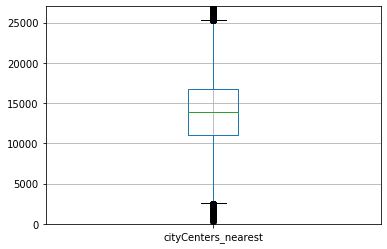

In [69]:
plt.ylim(-1, 27000)
real_estate_data.boxplot(['cityCenters_nearest']) 

In [70]:
len(real_estate_data.query('cityCenters_nearest > 27000'))

1471

In [71]:
# уберем выбросы и проверим результат для cityCenters_nearest
real_estate_data.drop(real_estate_data.query('cityCenters_nearest > 27000').index,inplace=True)
len(real_estate_data.query('cityCenters_nearest > 27000'))

0

### Вывод  
Мы прошлись по всем столбцам, заполнили пропуски где это возможно, и изменили тип данных, где это было необходимо.

<font color='green'>В целом, предобработка определенно удалась, применены верные методы, пропуски тщательно обработаны с опорой на прочие имеющиеся параметры, данные приведены к удобным типам. 

## Шаг 3. Вычисление вспомогательных данных

Добавим в таблицу необходимые для задания столбцы.

In [543]:
# Посчитаем цену за квадратный метр, округлим значение до сотых
real_estate_data['square_meter_price'] = round (real_estate_data['price_in_million'] * 10**6 / real_estate_data['total_area'], 2 )
real_estate_data['square_meter_price']

1         82920.79
2         92785.71
5         95065.79
6         99195.71
7        110544.69
           ...    
23691    129903.98
23692     45000.00
23695     52542.37
23696     44091.71
23698     41795.67
Name: square_meter_price, Length: 18690, dtype: float64

In [544]:
# Добавим столбцы с днем недели, месяцем и годом публикации объявления. Проверим результат
real_estate_data ['exposition_weekday'] = real_estate_data['exposition_date'].dt.weekday
real_estate_data ['exposition_month'] = real_estate_data['exposition_date'].dt.month
real_estate_data ['exposition_year'] = real_estate_data['exposition_date'].dt.year

real_estate_data.loc[:, ['exposition_date', 'exposition_weekday', 'exposition_month', 'exposition_year']]

,exposition_date,exposition_weekday,exposition_month,exposition_year
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
5,2018-09-10,0,9,2018
6,2017-11-02,3,11,2017
7,2019-04-18,3,4,2019
...,...,...,...,...
23691,2016-10-13,3,10,2016
23692,2017-07-07,4,7,2017
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018


Добавим столбец с типом этажа (первый, последний, другой). Для этого создадим вспомогательную функцию.

In [545]:
def to_floor_type(data):
    if data['floor'] == 1:
        return 'Первый'
    if data['floor'] == data['floors_total']:
        return 'Последний'
    return 'Другой'

In [546]:
# Построчно применим вспомогательную функцию к датасету. Проверим результат
real_estate_data['floor_type'] = real_estate_data.apply(to_floor_type, axis = 1)
real_estate_data['floor_type'].value_counts()

Другой       13912
Последний     2441
Первый        2337
Name: floor_type, dtype: int64

In [547]:
# Посчитаем и добавим соотношение жилой и общей площади, а также отношение площади кухни к общей. Проверим результат
real_estate_data ['living_to_total_ratio'] = round (real_estate_data['living_area'] / real_estate_data['total_area'], 2)
real_estate_data ['kitchen_to_total_ratio'] = round (real_estate_data['kitchen_area'] / real_estate_data['total_area'], 2)

real_estate_data.loc[:, ['living_to_total_ratio', 'kitchen_to_total_ratio']]

,living_to_total_ratio,kitchen_to_total_ratio
1,0.46,0.27
2,0.61,0.15
5,0.47,0.30
6,0.28,0.39
7,0.56,0.26
...,...,...
23691,0.55,0.15
23692,0.58,0.20
23695,0.64,0.14
23696,0.52,0.19


<font color=green>Так, ну что с этим ты справишься, я не сомневался.

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Пункт I
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [548]:
# Выведем сводную статистику по этим столбцам
real_estate_data[['total_area', 'price_in_million', 'rooms', 'ceiling_height']].describe()

,total_area,price_in_million,rooms,ceiling_height
count,18690.000000,18690.00000,18690.000000,18690.000000
mean,51.653276,4.71450,1.880952,2.654219
std,17.072283,2.15018,0.878398,0.137551
min,12.000000,0.43000,0.000000,2.250000
25%,38.400000,3.30000,1.000000,2.550000
50%,48.000000,4.35000,2.000000,2.600000
75%,62.000000,5.80000,3.000000,2.750000
max,115.000000,12.00000,6.000000,3.000000


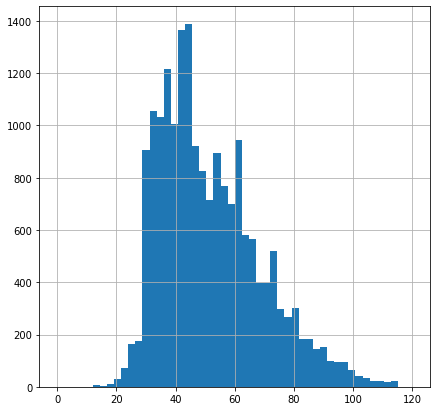

In [634]:
# Построим гистограмму для общей площади
real_estate_data['total_area'].hist(bins=50, range=(0, 120), figsize=(7,7))

Самые распространеные площади лежат в диапазоне от 30 до 80 квадратных мтеров.

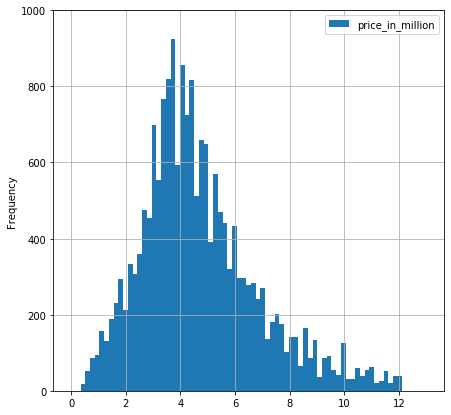

In [627]:
# Построим гистограмму для цены

real_estate_data.plot(kind='hist', y='price_in_million', figsize=(7,7), range=(0 , 13), ylim=(0,1000), bins=75, grid=True)

Больше всего квартир в ценовом диапазоне от 2 до 7 миллионов.

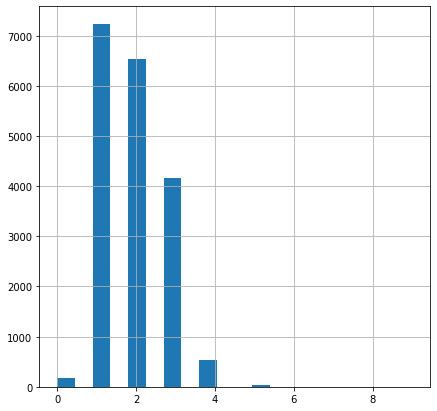

In [551]:
# Построим гистограмму для числа комнат
real_estate_data['rooms'].hist(bins=20, range=(0, 9),  figsize=(7,7))

Больше всего распространены одно-, двух- и трехкомнатные квартиры. Дальше наблюдается резкое снижение количества квартир.

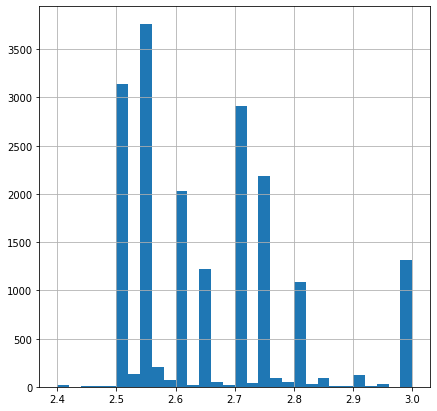

In [635]:
# Построим гистограмму для высоты потолков
real_estate_data['ceiling_height'].hist(bins=30, range=(2.4 , 3),  figsize=(7, 7))

Учитывая, что высоты потолков стандартизированы по ГОСТ, и при этом для "сталинок", "хрущовок" и тд высота будет своя. Этим объясняются пики на графике.

<font color='green'>Гистограммы построены, по ним сделаны подробные выводы.

### Пункт II
Изучим время продажи квартиры.

In [554]:
# Выведем сводную статистику по времени продажи
real_estate_data['days_exposition'].describe()

count    16465.000000
mean       168.545399
std        207.638925
min          1.000000
25%         43.000000
50%         89.000000
75%        211.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее: 180.63 или полгода  
Медиана: 95 дней или 3 месяца

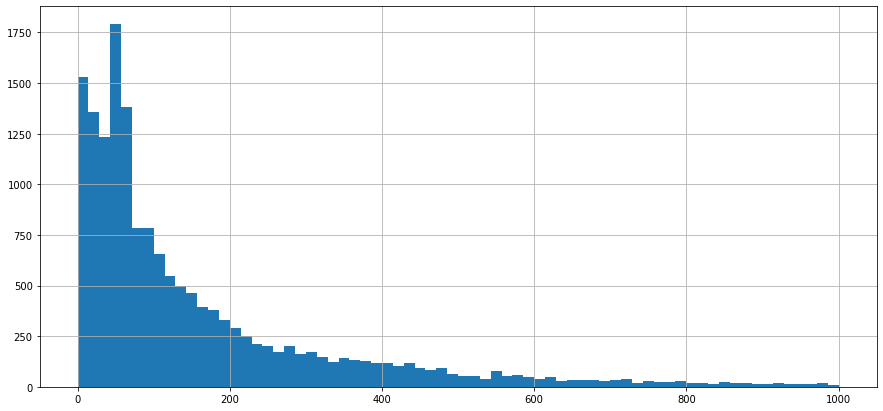

In [555]:
# Построим гистограмму для времени продажи
real_estate_data['days_exposition'].hist(bins=70, range=(0, 1000), figsize=(15,7))

В данныых явно есть выбросы где-то около начала графика. построим гистограмму для диапазона от 0 до 200.

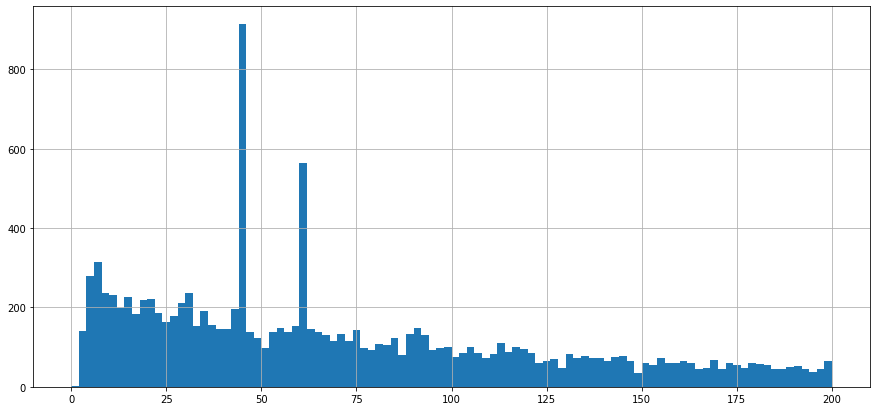

In [556]:
# Построим гистограмму для времени продажи для более узкого диапазона
real_estate_data['days_exposition'].hist(bins=100, range=(0, 200),  figsize=(15,7))

Выясняется, что у нас есть три выброса, которые сильно искажают картину.

In [557]:
# Отсортируем данные по убыванию
real_estate_data['days_exposition'].value_counts().sort_values(ascending=False).head(10)

45.0    791
60.0    469
7.0     203
30.0    181
4.0     149
3.0     137
5.0     129
14.0    125
44.0    122
9.0     122
Name: days_exposition, dtype: int64

По какм-то причинам мы имеем пиковые значения на слишком ровных значениях: неделя (7 дней), один, два и три месяца (30, 60 и 90 дней соответственно), и самый большой пик - полтора месяца (45 дней). 

In [558]:
# Выведем строки, где days_exposition равен 45
real_estate_data.query('days_exposition == 45')

,total_images,price_in_million,total_area,exposition_date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,living_to_total_ratio,kitchen_to_total_ratio


Получаем неочевидный результат: этот и любые аналогичные запросы выдают пустые строки, при попытке найти ячейку со значением 45.

In [559]:
# Выведем столбец полностью
real_estate_data['days_exposition']

1         81.0
2        558.0
5         55.0
6        155.0
7          NaN
         ...  
23691    519.0
23692    413.0
23695     45.0
23696      NaN
23698      NaN
Name: days_exposition, Length: 18690, dtype: float64

Видим *45* по индексу 23695.

In [560]:
# Обратимся к этому индексу
real_estate_data.loc[23695, 'days_exposition'] 

45.00000000000001

Вот и причина ошибки: единица на 15 знаке после запятой. Учитывая, что все остальные значения в столбце целые - это явная ошибка при выгрузке данных. 

In [561]:
# Округлим все значения в столбце до целых и проверим результат
real_estate_data['days_exposition']  = round(real_estate_data['days_exposition'] )
real_estate_data.query('days_exposition == 45').head()

,total_images,price_in_million,total_area,exposition_date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,living_to_total_ratio,kitchen_to_total_ratio
78,9,4.35,37.0,2018-02-22,1,2.75,19.0,18.0,6,False,False,False,10.7,0,Санкт-Петербург,34324.0,14192.0,0,NaN,0,NaN,45.0,117567.57,3,2,2018,Другой,0.49,0.29
89,9,2.50,63.0,2018-10-25,3,2.50,5.0,43.0,4,False,False,False,9.0,0,посёлок городского типа Сиверский,NaN,NaN,0,NaN,0,NaN,45.0,39682.54,3,10,2018,Другой,0.68,0.14
158,15,3.10,47.3,2017-11-07,2,2.55,5.0,27.5,2,False,False,False,8.5,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,45.0,65539.11,1,11,2017,Другой,0.58,0.18
166,0,2.30,60.0,2017-12-02,2,2.80,3.0,33.6,1,False,False,False,11.4,0,посёлок Плодовое,NaN,NaN,0,NaN,0,NaN,45.0,38333.33,5,12,2017,Первый,0.56,0.19
189,0,6.15,62.0,2017-10-13,3,2.55,9.0,41.5,5,False,False,False,8.5,2,Санкт-Петербург,41954.0,12168.0,1,10.0,0,NaN,45.0,99193.55,4,10,2017,Другой,0.67,0.14


<font color='blue'>Здорово копнул, разобрался как надо! На 45й и 60й день, в зависимости от типа объявления, на сервисе происходит автоматическая деактивация объявлений. Соответственно, строки действительно можно удалить, как несостоявшиеся сделки.

Теперь все работает без ошибок.  
Отфильтруем датасет, убрав строки равные 45, 60 и 90.

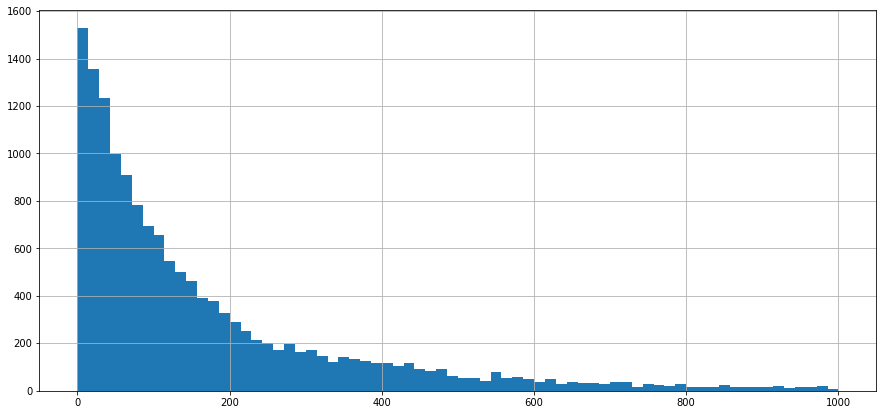

In [562]:
(real_estate_data
 .query('days_exposition != 45.0 \
 and days_exposition != 60.0 \
 and days_exposition != 90.0')
 ['days_exposition']
 .hist(bins=70, range=(0, 1000), figsize=(15,7)) 
)

Гистограмма стала более читаемой.  
С учетом среднего и медианы можно сделать следующие выводы: по большей части квартиры продаются за 3-6 месяцев. Срок продажи от 6 до 18 месяцев является медленным, но относительно распространенным. Все, что продается свыше полугода, можно считать аномально долгой продажей.

<s><font color=red> Некоторые выбросы мы убрали, но цена в 700 миллионов и площадь в 900 м не тоже не выглядят типичными значениями. Предлагаю в соответствии с заданием устроить основательную чистку данных отдельным пунктом. Этот проект в целом про графики, давай сдобрим этот раздел графиками boxplot. Они идеально подходят для охоты за выбросами.      

<S><font color='red'>Забегая вперед скажу, что в этом проекте обязательно необходимо показать умение автоматизировать построение графиков при помощи циклов. Можешь это сделать в этом разделе, можешь где-то еще, но сделать нужно. Это важное умение для аналитика.

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

### Пункт III
Узнаем, какие факторы больше всего влияют на стоимость квартиры.

In [563]:
# Узнаем корреляцию между ценой, квадратным метром, числом комнат и удалённостью от центра
real_estate_data[['price_in_million', 'total_area', 'rooms', 'cityCenters_nearest']].corr()['price_in_million']

price_in_million       1.000000
total_area             0.679463
rooms                  0.415916
cityCenters_nearest   -0.323546
Name: price_in_million, dtype: float64

Видим, что сильнее всего на цену влияет площадь, а расстояние от центра влияет отрицательно: чем дальше, тем дешевле цены.

<font color=green>Матрица корреляции построена верно. 

In [564]:
# Узнаем корреляцию между ценой и всеми остальными данными
real_estate_data.corr()['price_in_million']

total_images              0.160653
price_in_million          1.000000
total_area                0.679463
rooms                     0.415916
ceiling_height            0.292852
floors_total              0.250315
living_area               0.558515
floor                     0.169577
is_apartment              0.008916
studio                   -0.070921
open_plan                -0.049400
kitchen_area              0.503733
balcony                   0.086816
airports_nearest         -0.000092
cityCenters_nearest      -0.323546
parks_around3000          0.258392
parks_nearest             0.057600
ponds_around3000          0.305326
ponds_nearest            -0.044869
days_exposition           0.060793
square_meter_price        0.641653
exposition_weekday       -0.012011
exposition_month          0.007720
exposition_year           0.007064
living_to_total_ratio     0.021282
kitchen_to_total_ratio   -0.155470
Name: price_in_million, dtype: float64

Высота потолков, жилая площадь, площадь кухни сильно влияют на повышение цены.  
Этаж, апартаменты, наличие балкона, наличие парков и прудов рядом повышают цену, но незначительно.
Большое количество этажей, студии, открытая планировка, удаленность от аэропорта, парков или прудов понижают цену.

<s><font color=brown>Раз уж мы пользуемся таким инструментом, почему бы не пройтись по всему датафрейму и не убедиться, что мы не упустили больше никаких потенциальных зависимостей? Вдруг цена коррелирует с парками сильнее, чем мы думаем?

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил

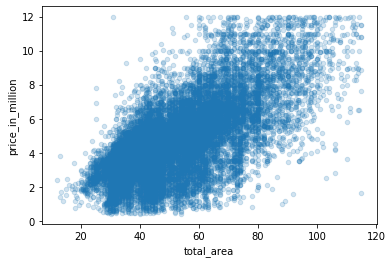

In [637]:
# Построим точечную диаграмму для зависимости цены от площади
(real_estate_data
 .sort_values( 'total_area')
 .plot(x='total_area', y='price_in_million', kind='scatter', alpha=0.2)
)

В целом видно, что облако растет линейно.

In [568]:
# Сгруппируем данные по площади и посчитаем медианную цену
area_group = ( real_estate_data
              .groupby('total_area')
              .agg({'price_in_million': ['median']})
             )
area_group.columns = ['median_price_in_million']
area_group

,median_price_in_million
total_area,
12.0,2.400
13.0,2.600
13.2,1.686
14.0,1.190
15.0,1.725
...,...
114.0,8.800
114.2,11.000
114.3,6.500


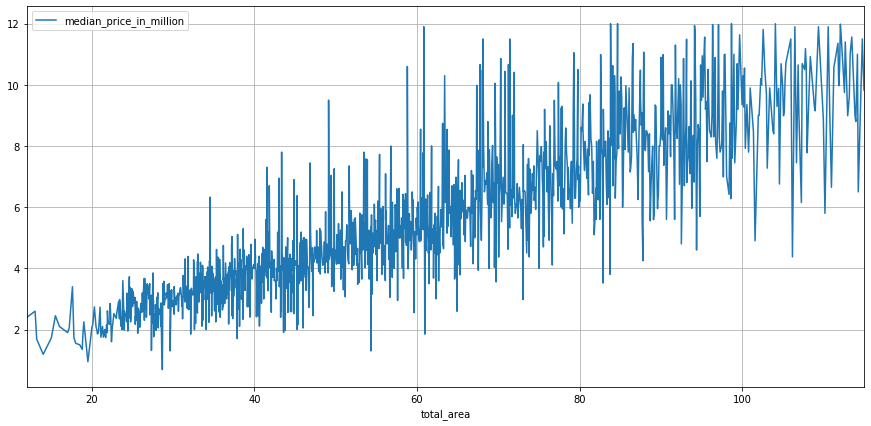

In [638]:
# Построим график по сгруппированным данным
area_group.plot( y='median_price_in_million' ,  figsize=(15,7), grid=True)

Видим ту же самую картину - линейную зависимость между ценой и площадью.

***

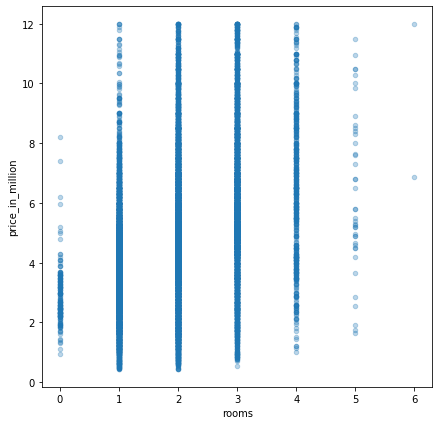

In [639]:
# Построим точечную диаграмму для зависимости цены от количества комнат
real_estate_data.sort_values( 'rooms').plot(x='rooms', y='price_in_million', figsize=(7,7),   kind='scatter', alpha=0.3)

Больше всего квартир с самыми высокими ценами приходится на трех-,четырех- и пятикомнатные квартиры.

In [572]:
# Сгруппируем данные по комнатам и посчитаем медианную цену
room_group = ( real_estate_data
              .groupby('rooms')
              .agg({'price_in_million': ['median']})
             )
room_group.columns = ['median_price_in_million']
room_group

,median_price_in_million
rooms,
0,2.700
1,3.600
2,4.650
3,5.650
4,6.450
5,5.800
6,9.432


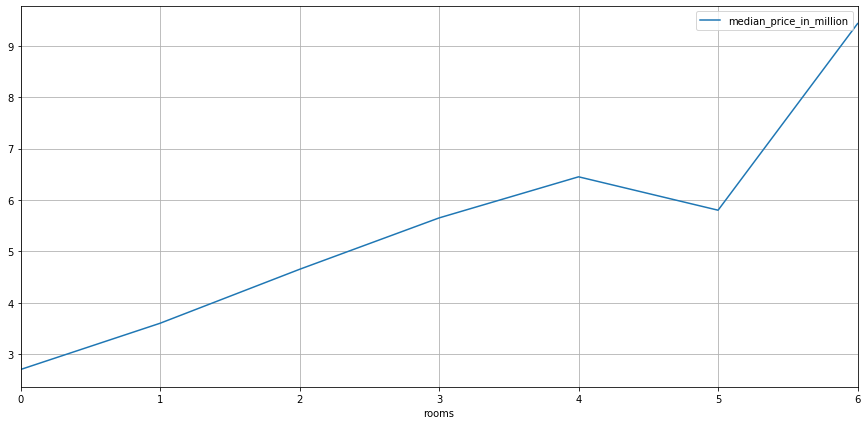

In [641]:
# Построим график по сгруппированным данным
room_group.plot(y='median_price_in_million', figsize=(15,7), grid=True)
plt.xticks(np.arange(0,7,1))

plt.show()

***

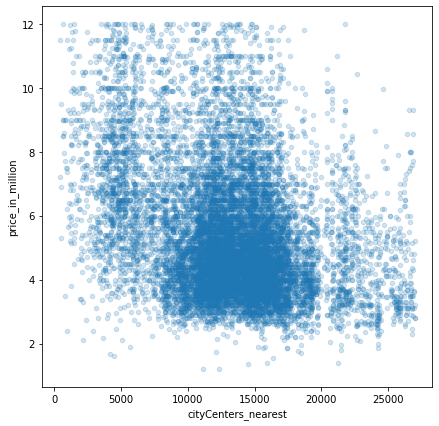

In [643]:
# Построим точечную диаграмму для зависимости цены от удалённости от центра
(real_estate_data
 .sort_values('cityCenters_nearest')
 .plot(x='cityCenters_nearest', y='price_in_million', figsize=(7,7),   kind='scatter' , alpha=0.2,)
)

График трудно анализировать, но заметно, что больше всегообъявлений располагаются примерно от 10 до 15 километров.

In [577]:
# Сгруппируем данные по удаленности от центра и посчитаем медианную цену
center_group = ( real_estate_data
              .groupby('cityCenters_nearest')
              .agg({'price_in_million': ['median'],
                     'square_meter_price': ['median']})
             )
center_group.columns = ['median_price_in_million', 'median_square_meter_price']
center_group

,median_price_in_million,median_square_meter_price
cityCenters_nearest,,
392.0,11.50,200348.43
399.0,7.20,90000.00
467.0,5.30,108163.27
472.0,6.90,144957.98
515.0,9.50,117283.95
...,...,...
26921.0,3.65,107988.17
26954.0,4.80,80000.00
26966.0,3.60,102272.73


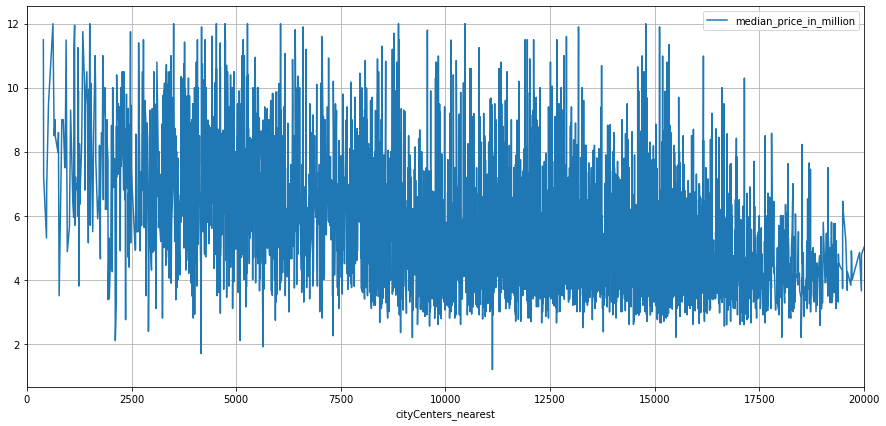

In [647]:
# Построим график по сгруппированным данным по цене в миллионах
center_group.plot(y='median_price_in_million', xlim=(0,  20000), figsize=(15,7), grid=True)

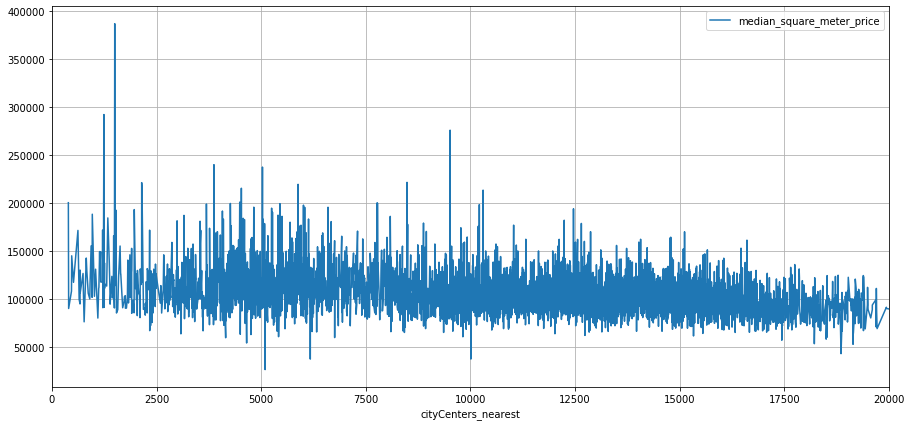

In [579]:
# Построим график по сгруппированным данным по цене за квадртаный метр
center_group.plot(y='median_square_meter_price', xlim=(0,  20000), figsize=(15,7), grid=True)

Ситуация сохранилась: видно, что наибольшая стоимость жилья в квартирах, которые расположены примерно до 7,5 километров от центра.

***

In [580]:
# Изучим зависимость цены от этажа
(real_estate_data
 .groupby('floor_type')
 .agg({'price_in_million': ['median'],'square_meter_price': ['median']})
 .sort_values(('price_in_million','median'), ascending=False)
)

,price_in_million,square_meter_price
,median,median
floor_type,,
Другой,4.5,96823.155
Последний,3.9,84444.440
Первый,3.7,80000.000


Первый этаж - самый дешевый. На промежуточных этажах цены выше.

***

Изучим зависимость цены от дня недели, месяца и года публикации.

In [581]:
# Создадим словарь, где в качестве ключей будут имена столбцов,
# а в качестве значений - сгруппированные данные по этому столбцу
list_of_columns = ['exposition_weekday', 'exposition_month', 'exposition_year']
list_of_group = dict.fromkeys(list_of_columns)
counter = 0

for key in list_of_group.keys():
    list_of_group[key] = (real_estate_data
                          .groupby(key)
                          .agg({'price_in_million': ['median'],'square_meter_price': ['median']})
                          .sort_values(key)
                         )
    list_of_group[key].columns= ['median_price_in_million', 'median_square_meter_price']
    counter+=1

In [582]:
# Переведем числовые индексы в строковые
list_of_group['exposition_month'].index = map(lambda x: calendar.month_name[x], list_of_group['exposition_month'].index)
list_of_group['exposition_weekday'].index = map(lambda x: calendar.day_name[x], list_of_group['exposition_weekday'].index)

In [583]:
list_of_group['exposition_weekday'].sort_values('median_price_in_million', ascending=False)

,median_price_in_million,median_square_meter_price
Wednesday,4.390,94326.62
Tuesday,4.365,93650.79
Monday,4.350,93302.18
Saturday,4.350,92334.49
Sunday,4.350,93750.00
Thursday,4.300,93333.33
Friday,4.300,93181.82


In [584]:
list_of_group['exposition_month'].sort_values('median_price_in_million', ascending=False)

,median_price_in_million,median_square_meter_price
April,4.500,95508.980
November,4.400,94285.710
March,4.350,93594.770
September,4.350,94313.450
January,4.310,94065.025
February,4.300,93569.065
May,4.300,91649.660
August,4.300,94594.590
October,4.300,92954.550
December,4.300,91803.280


In [585]:
list_of_group['exposition_year'].sort_values('median_price_in_million', ascending=False)

,median_price_in_million,median_square_meter_price
exposition_year,,
2014,4.9200,96774.19
2015,4.7000,90806.57
2019,4.7000,101875.00
2018,4.3000,94615.45
2017,4.2325,91392.78
2016,4.2000,90000.00


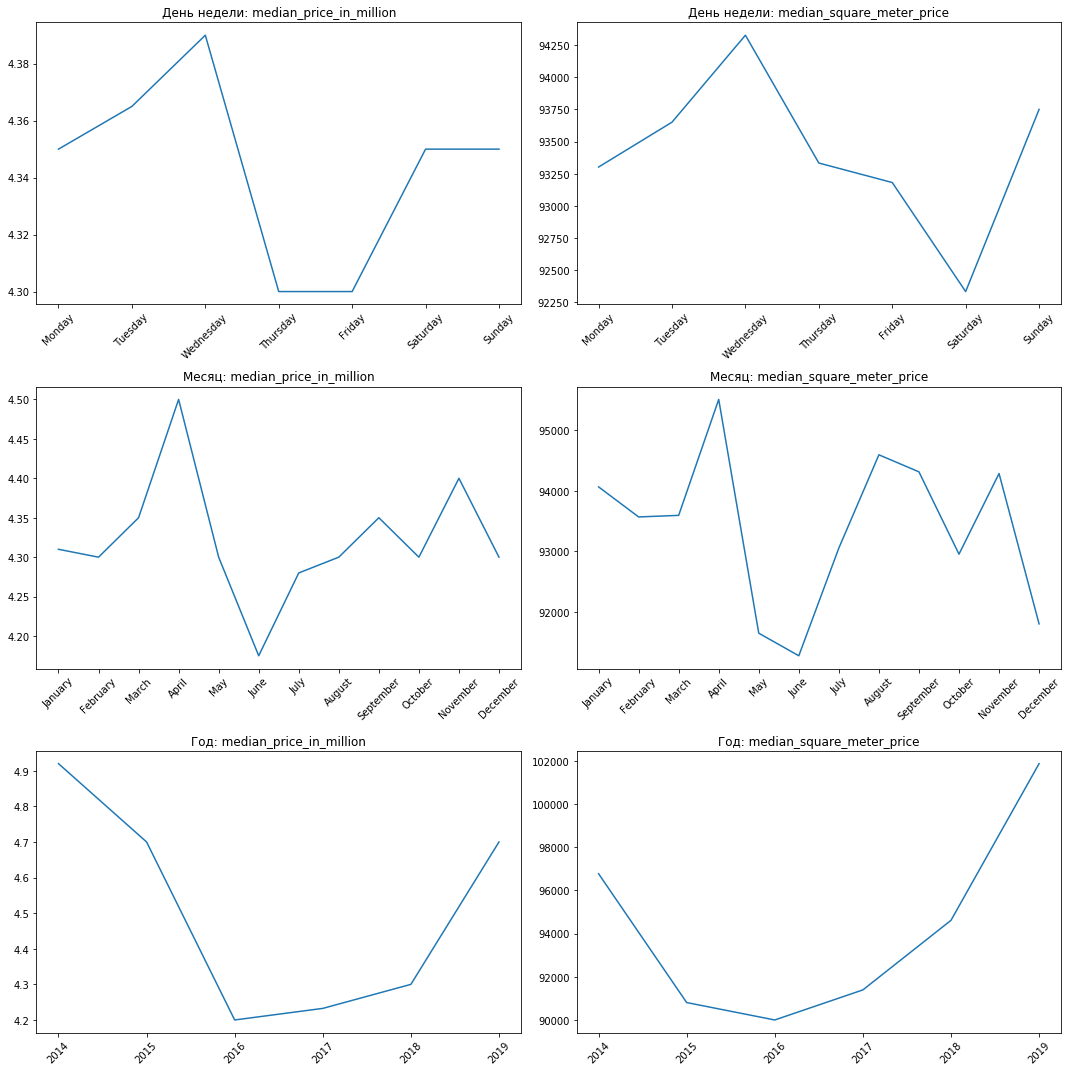

In [586]:
# Построим графики по этим данным
list_of_agg = ['median_price_in_million','median_square_meter_price']
list_of_titles = ['День недели','Месяц', 'Год']

fig = plt.figure(figsize=(15,15))

for i in range(3):
    for j in range(2):
        plt.subplot2grid((3,2), (i, j)).plot(list_of_group[ list_of_columns[i] ].index,
                                             list_of_group[ list_of_columns[i] ][list_of_agg[j]]
                                            )
        plt.title("{}: {}".format( list_of_titles[i], list_of_agg[j]))   
        plt.xticks(rotation=45)
        
fig.tight_layout()
plt.show()

Самая низкие цены приходятся на выходные (суббота и воскресенье), самые высокие - на середину недели (вторник и среда).  
Самая высокие цены приходятся на апрель и август, самые низкие - на май и июнь. Скорее всего такой результат обусловлен сезонностью спроса на жилье.  
Самая высокие цены приходятся на 14ый год, самые низкие - на 16ый год.

<S><font color=brown>Здесь также очень напрашиваются линейные графики.

<font color=green>В остальном, анализ зависимости цены от прочих параметров проведен на отлично. Найдены коэффициенты коррелляции, построены наглядные визуализации, вручную исследованы зависимости там, где применение корреляции невозможно.

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Автоматизировал процесс построения графиков и группировки данных

<b>UPD <font color=green>Отлично справился.

### Пункт IV

In [587]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений, посчитаем для них среднюю цену квадратного метра.
top_10_locality = ( real_estate_data
                   .groupby('locality_name')
                   .agg( {'locality_name': ['count'], 'square_meter_price': ['mean']} )
                   .sort_values(by=('locality_name','count'), ascending=False)
                   .head(10)                 
                  )
top_10_locality.columns = ['count', 'mean_square_meter_price']
top_10_locality['mean_square_meter_price'] = round(top_10_locality['mean_square_meter_price'], 2)

top_10_locality

,count,mean_square_meter_price
locality_name,,
Санкт-Петербург,12626,105288.36
посёлок Мурино,517,85678.89
Всеволожск,384,67081.86
посёлок Парголово,323,90382.27
Гатчина,296,68527.65
деревня Кудрово,285,92899.77
посёлок Шушары,249,80788.14
Выборг,212,57950.24
Кудрово,163,99835.06


In [588]:
# Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 
top_10_locality.query('mean_square_meter_price == mean_square_meter_price.min() \
                      or \
                      mean_square_meter_price == mean_square_meter_price.max()')

,count,mean_square_meter_price
locality_name,,
Санкт-Петербург,12626,105288.36
Выборг,212,57950.24


В Санкт-Петербург больше всего объявлений, и там же самое дорогое жилье. В Выборге наблюдается полностью обратная ситуация: меньше всего объявлений при самой низкой цене.

### Пункт V
Выясним, какая область входит в центр.

Общую цену смотреть не очень полезно - она сильно плавает в зависимости от площади. Цена за м2 более взвешенный параметр. В остальных случаях, соответственно, тоже  м2.

In [589]:
# Создадим столбец с расстоянием до центра в километрах, округлим до целых значений, проверим результат
real_estate_data['centers_nearest_in_km'] = round (real_estate_data['cityCenters_nearest'] / 1000)
real_estate_data['centers_nearest_in_km']

1        19.0
2        14.0
5         NaN
6        19.0
7        12.0
         ... 
23691     4.0
23692     NaN
23695     NaN
23696     NaN
23698     NaN
Name: centers_nearest_in_km, Length: 18690, dtype: float64

In [590]:
# Выделим квартиры из Санкт-Петербурга и проверим результат
petersburg = real_estate_data.query('locality_name == "Санкт-Петербург" ')
petersburg.head()

,total_images,price_in_million,total_area,exposition_date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,living_to_total_ratio,kitchen_to_total_ratio,centers_nearest_in_km
2,10,5.196,56.0,2015-08-20,2,2.55,5.0,34.300,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,Другой,0.61,0.15,14.0
7,5,7.915,71.6,2019-04-18,2,2.75,24.0,40.096,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019,Другой,0.56,0.26,12.0
9,18,5.400,61.0,2017-02-26,3,2.50,9.0,43.600,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,Другой,0.71,0.11,15.0
10,5,5.050,39.6,2017-11-16,1,2.67,12.0,20.300,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.25,3,11,2017,Другой,0.51,0.21,14.0
15,16,4.650,39.0,2017-11-18,1,2.60,14.0,20.500,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,119230.77,5,11,2017,Другой,0.53,0.19,14.0


In [591]:
# Сгруппируем данные по километрам и выведем среднюю цену
peter_group = ( petersburg
               .groupby('centers_nearest_in_km')
               .agg({'price_in_million': ['mean'],
                     'square_meter_price': ['mean']}) )

peter_group.columns = ['mean_price_in_million', 'mean_square_meter_price']

peter_group['mean_price_in_million'] = round(peter_group['mean_price_in_million'], 2)
peter_group['mean_square_meter_price'] = round(peter_group['mean_square_meter_price'], 2)

peter_group.sort_index().head()

,mean_price_in_million,mean_square_meter_price
centers_nearest_in_km,,
0.0,7.72,135867.42
1.0,7.99,125653.34
2.0,7.60,118310.36
3.0,7.02,110226.50
4.0,7.26,117334.22


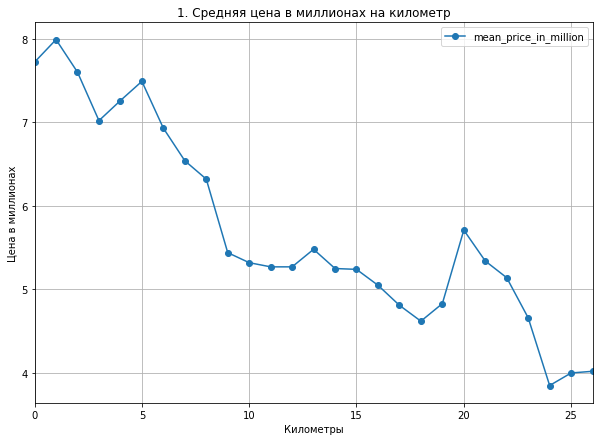

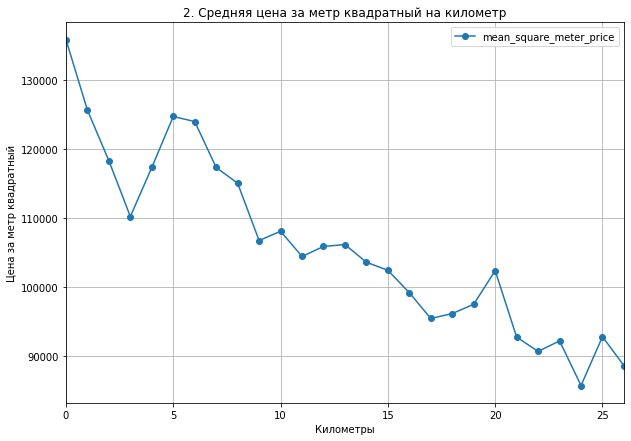

In [592]:
# Посторим графики
peter_group.plot( y='mean_price_in_million', style='o-', figsize=(10,7), grid=True)
plt.title('1. Средняя цена в миллионах на километр')
plt.xlabel(u'Километры')
plt.ylabel(u'Цена в миллионах')

peter_group.plot( y='mean_square_meter_price', style='o-', figsize=(10,7), grid=True)
plt.title('2. Средняя цена за метр квадратный на километр')
plt.xlabel(u'Километры')
plt.ylabel(u'Цена за метр квадратный')

plt.show()

Видим резкое изменение поведение графика на отметке в 3, 7 и 9 километрах. После семи километров цена жилья в основном снижается. Начиная с 9 километра, снижение цены становится более плавным. Учитывая анализ, проведенный в пункте III, 7 километров - это и есть центральная зона.  
Локальный минимум на 3 километре и локальный максимум на 7 скорее всего обусловлены каким-то фактором географии и рынка жилья Санкт-Петербурга.

<font color='green'>С выбором центральной зоны невозможно не согласиться. Целых два графика как аргумент.

### Пункт VI
Проанализируем сегмент квартир в центре.

In [593]:
# Выделим квартиры из Санкт-Петербурга и проверим результат
petersburg_center = petersburg.query('centers_nearest_in_km <= 7')
petersburg_center.head()

,total_images,price_in_million,total_area,exposition_date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,living_to_total_ratio,kitchen_to_total_ratio,centers_nearest_in_km
24,8,6.50,97.2,2015-10-31,2,2.80,3.0,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265.0,66872.43,5,10,2015,Первый,0.48,0.20,2.0
61,18,7.99,74.0,2017-08-24,2,3.00,4.0,43.0,4,False,False,False,20.0,0,Санкт-Петербург,22568.0,4288.0,1,363.0,0,NaN,609.0,107972.97,3,8,2017,Последний,0.58,0.27,4.0
94,3,3.50,29.5,2019-04-26,1,2.50,5.0,15.6,2,False,False,False,5.5,1,Санкт-Петербург,12921.0,7303.0,0,NaN,0,NaN,4.0,118644.07,4,4,2019,Другой,0.53,0.19,7.0
99,32,9.60,90.0,2017-09-26,4,2.55,5.0,67.0,2,False,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0,NaN,0,NaN,104.0,106666.67,1,9,2017,Другой,0.74,0.09,3.0
111,4,4.59,40.0,2017-05-29,1,3.00,6.0,18.0,1,False,False,False,10.0,0,Санкт-Петербург,20062.0,6175.0,1,241.0,0,NaN,31.0,114750.00,0,5,2017,Первый,0.45,0.25,6.0


In [594]:
# Выведем сводную статистику по этим столбцам
real_estate_data[['total_area', 'price_in_million', 'rooms', 'ceiling_height']].describe()

,total_area,price_in_million,rooms,ceiling_height
count,18690.000000,18690.00000,18690.000000,18690.000000
mean,51.653276,4.71450,1.880952,2.654219
std,17.072283,2.15018,0.878398,0.137551
min,12.000000,0.43000,0.000000,2.250000
25%,38.400000,3.30000,1.000000,2.550000
50%,48.000000,4.35000,2.000000,2.600000
75%,62.000000,5.80000,3.000000,2.750000
max,115.000000,12.00000,6.000000,3.000000


In [595]:
# Выведем сводную статистику по этим столбцам
petersburg_center[['total_area', 'price_in_million', 'rooms', 'ceiling_height']].describe()

,total_area,price_in_million,rooms,ceiling_height
count,1611.000000,1611.000000,1611.000000,1611.000000
mean,61.860000,7.168292,2.176909,2.770975
std,20.418129,2.203721,0.942634,0.182304
min,12.000000,1.600000,0.000000,2.400000
25%,45.350000,5.500000,1.000000,2.600000
50%,60.000000,6.900000,2.000000,2.750000
75%,75.900000,8.700000,3.000000,3.000000
max,114.800000,12.000000,6.000000,3.000000


<font color='green'>Очень наглядно. Но не помешало бы сразу добавить комментарии по главным отличиям.

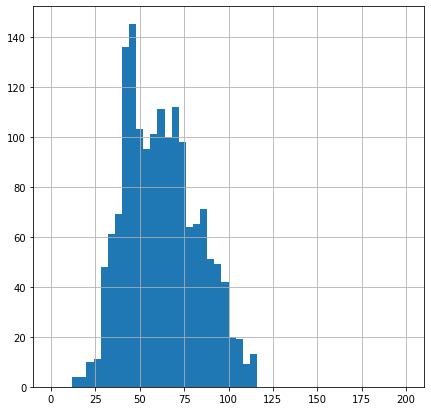

In [596]:
# Построим гистограмму для общей площади
petersburg_center['total_area'].hist( bins=50, range=(0, 200), figsize=(7,7))

Самые распространеные площади лежат в диапазоне от 30 до 80 квадратных мтеров.

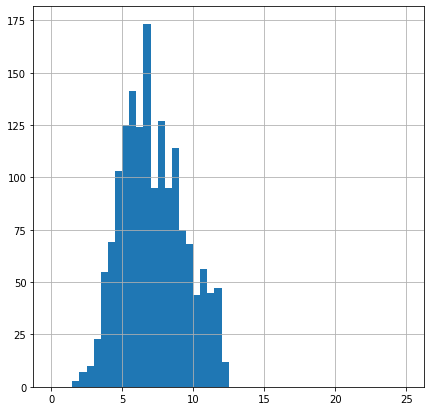

In [597]:
# Построим гистограмму для цены
petersburg_center['price_in_million'].hist(bins=50,  range=(0, 25), figsize=(7,7))

Больше всего квартир в ценовом диапазоне от 2 до 8 миллионов.

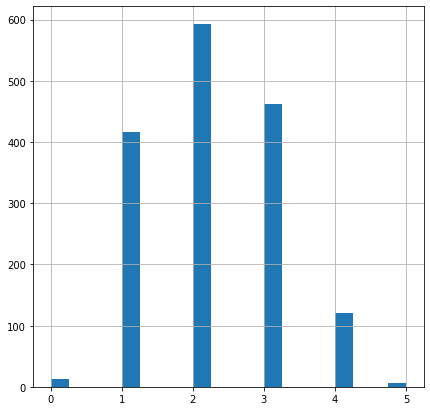

In [649]:
# Построим гистограмму для числа комнат
petersburg_center['rooms'].hist(bins=20, range=(0, 5),  figsize=(7,7))

По сравнению с общим графиком из пункта I, в центре также преобладают и четырехкомнатные квартиры.

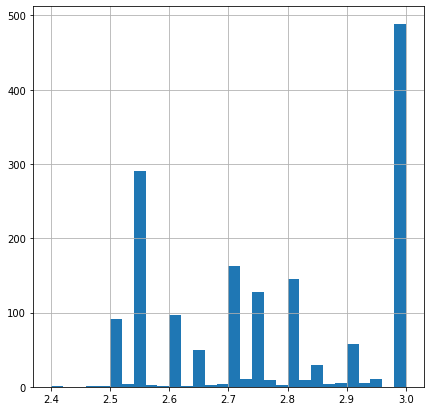

In [648]:
# Построим гистограмму для высоты потолков
petersburg_center['ceiling_height'].hist(bins=30, range=(2.4 , 3),  figsize=(7, 7))

Трехметровые потолки - самые распространенные.

***

In [601]:
# Узнаем корреляцию между ценой, квадратным метром, числом комнат и удалённостью от центра
petersburg_center[['price_in_million', 'total_area', 'rooms', 'cityCenters_nearest']].corr()['price_in_million']

price_in_million       1.000000
total_area             0.701840
rooms                  0.446760
cityCenters_nearest   -0.122339
Name: price_in_million, dtype: float64

Картина та же, что и для всей области.

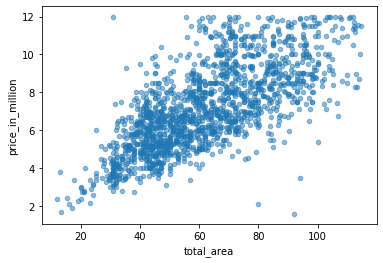

In [651]:
# Построим точечную диаграмму для зависимости цены от площади
(petersburg_center
 .sort_values( 'total_area')
 .plot(x='total_area', y='price_in_million',  kind='scatter', alpha=0.5)
)

Облако стало заметно тоньше, но оно по прежнему растет линейно.

In [603]:
# Сгруппируем данные по площади и посчитаем медианную цену
peter_area_group = ( petersburg_center
              .groupby('total_area')
              .agg({'price_in_million': ['median']})
             )
peter_area_group.columns = ['median_price_in_million']
peter_area_group

,median_price_in_million
total_area,
12.0,2.400
13.0,3.800
13.2,1.686
15.5,2.450
16.0,2.100
...,...
113.2,8.290
113.5,11.564
114.0,8.700


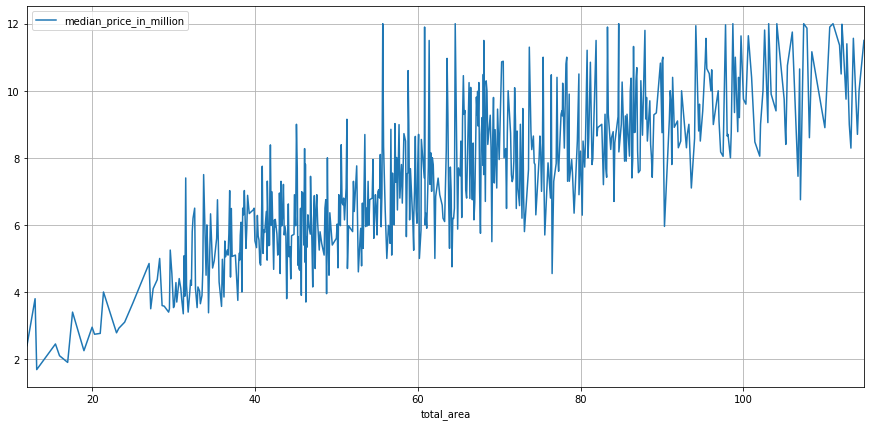

In [652]:
# Построим график по сгруппированным данным
peter_area_group.plot( y='median_price_in_million' ,   figsize=(15,7), grid=True)

Видим ту же самую картину, что и для области - линейную зависимость между ценой и площадью. Однако  для центра свойсвтенны в разы более высокие цены.

***

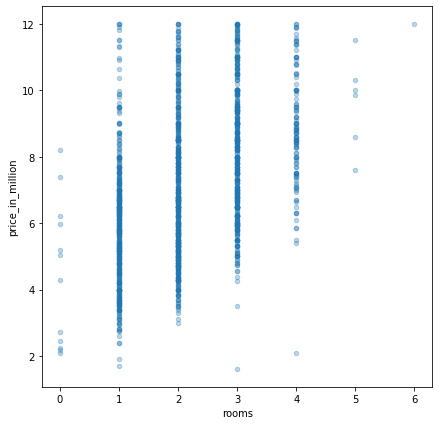

In [654]:
# Построим точечную диаграмму для зависимости цены от количества комнат
(petersburg_center
 .sort_values('rooms')
 .plot(x='rooms', y='price_in_million',
        
       figsize=(7,7),   kind='scatter', alpha=0.3
      )
)

Пик приходится на те же значения, что и в области.

In [606]:
# Сгруппируем данные по комнатам и посчитаем медианную цену
peter_room_group = ( petersburg_center
              .groupby('rooms')
              .agg({'price_in_million': ['median']})
             )
peter_room_group.columns = ['median_price_in_million']
peter_room_group

,median_price_in_million
rooms,
0,4.665
1,5.830
2,6.690
3,8.000
4,8.700
5,9.925
6,12.000


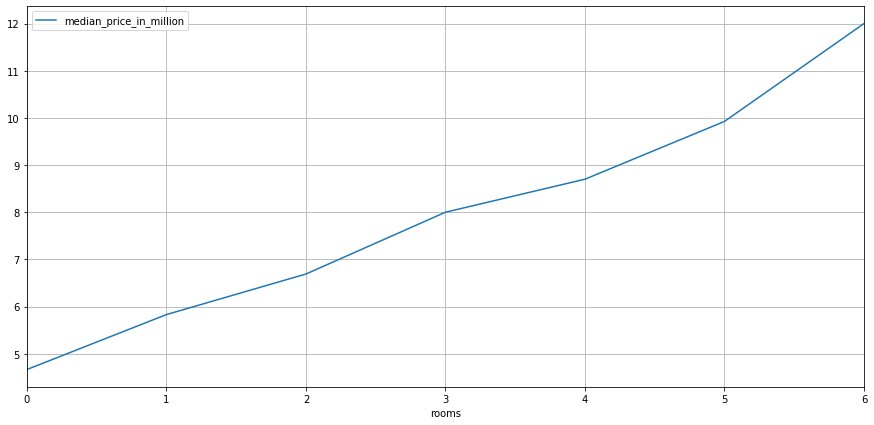

In [656]:
# Построим график по сгруппированным данным
peter_room_group.plot(y='median_price_in_million',  figsize=(15,7), grid=True)
plt.xticks(np.arange(0,7,1))

plt.show()

В отличие от области, медианная цена  растет почти линейно при увеличении числа комнат.

***

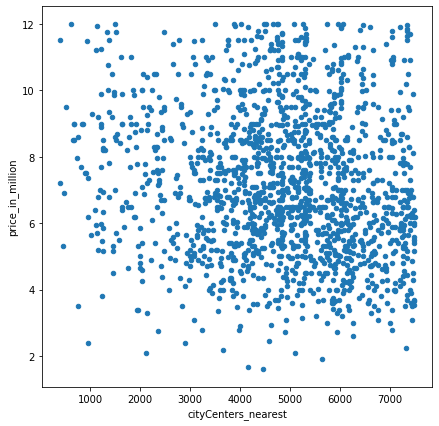

In [660]:
# Построим точечную диаграмму для зависимости цены от удалённости от центра
(petersburg_center
 .sort_values('cityCenters_nearest')
 .plot(x='cityCenters_nearest', y='price_in_million',      
       figsize=(7,7),   kind='scatter'
      )
)

График трудно анализировать, но заметно, что цены убывают.

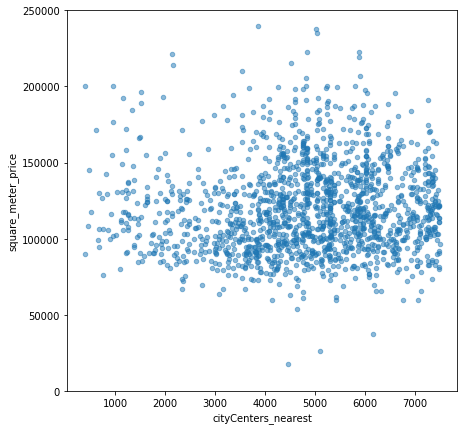

In [662]:
# Построим аналогичную диаграмму для зависимости от квадртного метра
(petersburg_center
 .sort_values('square_meter_price')
 .plot(x='cityCenters_nearest', y='square_meter_price',
       ylim=(0, 250000),
       figsize=(7,7),  alpha=0.5,  kind='scatter'
      )
)

Больше всего объявлений находится между 4 и 5 километрами.

In [610]:
# Сгруппируем данные по удаленности от центра и посчитаем медианную цену
peter_center_group = ( petersburg_center
              .groupby('cityCenters_nearest')
              .agg({'price_in_million': ['median'],
                     'square_meter_price': ['median']})
             )
peter_center_group.columns = ['median_price_in_million', 'median_square_meter_price']
peter_center_group

,median_price_in_million,median_square_meter_price
cityCenters_nearest,,
392.0,11.500,200348.43
399.0,7.200,90000.00
467.0,5.300,108163.27
472.0,6.900,144957.98
515.0,9.500,117283.95
...,...,...
7477.0,6.000,81081.08
7480.0,5.450,112406.61
7485.0,6.390,111130.43


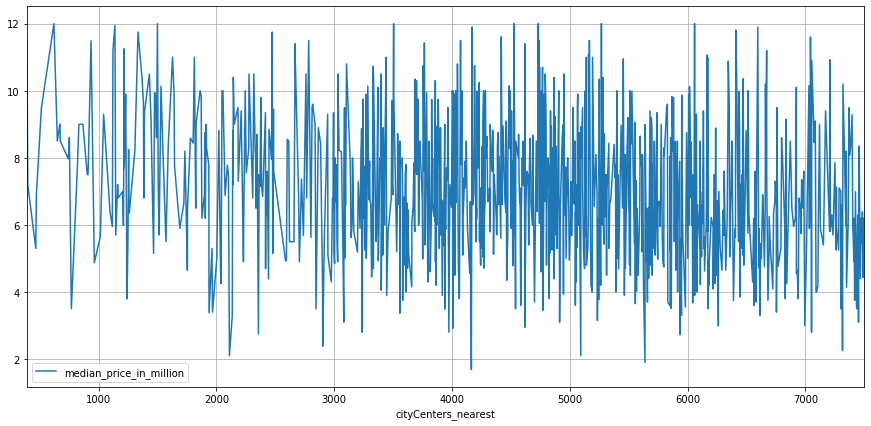

In [611]:
# Построим график по сгруппированным данным по цене в миллионах
peter_center_group.plot(y='median_price_in_million',  figsize=(15,7), grid=True)

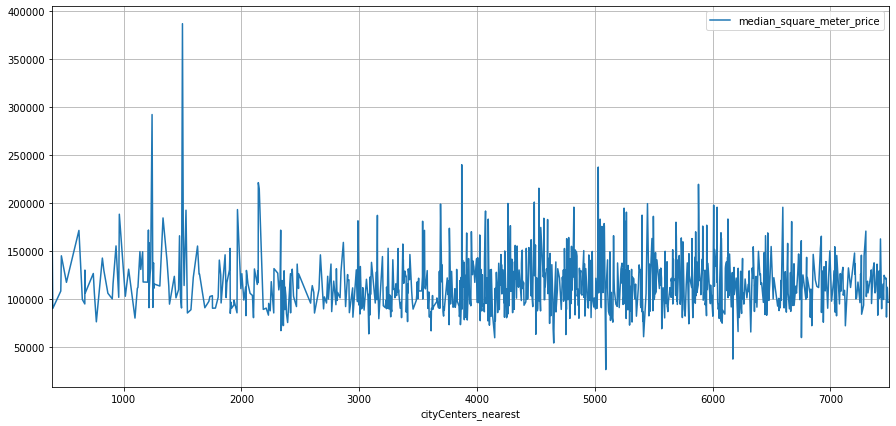

In [612]:
# Построим график по сгруппированным данным по цене за квадртаный метр
peter_center_group.plot(y='median_square_meter_price',   figsize=(15,7), grid=True)

В центральной зоне удаленонсть от центра слабо влияет на цену, но заметно влияет на колчиество публикуемых объявлений.

***

In [613]:
# Изучим зависимость цены от этажа
(petersburg_center
 .groupby('floor_type')
 .agg({'price_in_million': ['median'],'square_meter_price': ['median']})
 .sort_values(('price_in_million','median'), ascending=False)
)

,price_in_million,square_meter_price
,median,median
floor_type,,
Другой,7.1595,120746.995
Последний,6.8000,109518.070
Первый,5.8825,102926.135


Картина такая же, как и для области, но цены в разы выше.

***

Изучим зависимость цены от дня недели, месяца и года публикации.

In [614]:
# Создадим словарь, где в качестве ключей будут имена столбцов,
# а в качестве значений - сгруппированные данные по этому столбцу
list_of_columns = ['exposition_weekday', 'exposition_month', 'exposition_year']
list_of_group_center = dict.fromkeys(list_of_columns)
counter = 0

for key in list_of_group_center.keys():
    list_of_group_center[key] = (petersburg_center
                                 .groupby(key)
                                 .agg({'price_in_million': ['median'],'square_meter_price': ['median']})
                                 .sort_values(key)
                                )
    list_of_group_center[key].columns= ['median_price_in_million', 'median_square_meter_price']
    counter+=1

In [615]:
# Переведем числовые индексы в строковые
list_of_group_center['exposition_month'].index = map(lambda x: calendar.month_name[x], list_of_group_center['exposition_month'].index)
list_of_group_center['exposition_weekday'].index = map(lambda x: calendar.day_name[x], list_of_group_center['exposition_weekday'].index)

In [616]:
list_of_group_center['exposition_weekday'].sort_values('median_price_in_million', ascending=False)

,median_price_in_million,median_square_meter_price
Sunday,7.650,121909.615
Monday,6.990,115918.370
Friday,6.980,116257.230
Tuesday,6.975,113935.485
Wednesday,6.900,115384.620
Saturday,6.880,122341.510
Thursday,6.650,114862.000


In [617]:
list_of_group_center['exposition_month'].sort_values('median_price_in_million', ascending=False)

,median_price_in_million,median_square_meter_price
September,7.2490,119596.540
October,7.1000,113185.250
April,7.0000,116257.230
August,6.9970,117079.650
March,6.9900,127173.910
January,6.9245,112203.850
May,6.8900,115148.400
July,6.8750,113266.865
February,6.8000,118397.090
November,6.8000,111731.840


In [618]:
list_of_group_center['exposition_year'].sort_values('median_price_in_million', ascending=False)

,median_price_in_million,median_square_meter_price
exposition_year,,
2015,7.254,110136.130
2019,6.970,130722.805
2018,6.900,118109.150
2017,6.890,113590.765
2016,6.800,110843.370
2014,5.940,105157.890


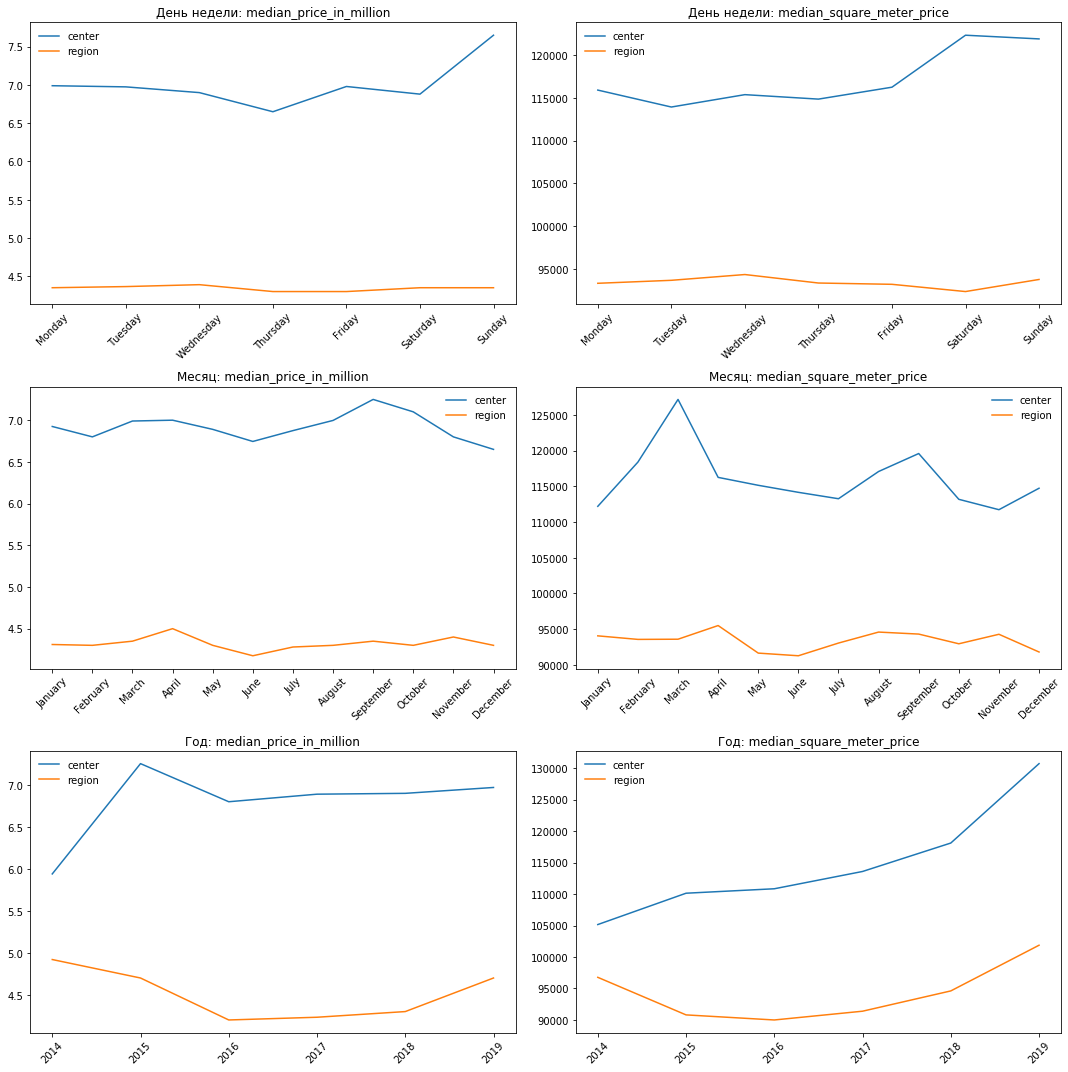

In [619]:
# Построим графики по этим данным и сравним их с данными по региону
list_of_agg = ['median_price_in_million','median_square_meter_price']
list_of_titles = ['День недели','Месяц', 'Год']

fig = plt.figure(figsize=(15,15))

for i in range(3):
    for j in range(2):
        plt.subplot2grid((3,2), (i, j)).plot(list_of_group_center[ list_of_columns[i] ].index,
                                             list_of_group_center[ list_of_columns[i] ][list_of_agg[j]],
                                             
                                             list_of_group[ list_of_columns[i] ].index,
                                             list_of_group[ list_of_columns[i] ][list_of_agg[j]]
                                            )      
        plt.title("{}: {}".format( list_of_titles[i], list_of_agg[j]))
        plt.legend(('center', 'region'), frameon=False)
        plt.xticks(rotation=45)
        
fig.tight_layout()
plt.show()

По дням: На выходные приходятся самые высокие цены, в отличие от регионов.
По месяцам: картина в целом совпадает.
По годам: Есть резкий всплеск цены в 15 году.

Видно, что по большей части графики примерно похожи по форме (то есть сохраняются основные закономерности и тренды), однако графики по центру располгаются гораздо выше(так как в центре выше цены).
Кроме того, перепады между ценами для центра намного заметнее.

<S><font color='brown'>Вот было бы здорово изобразить оба графика на одних осях и наглядно сравнить.

<font color='green'>Очень тщательный анализ центра и сравнение его со всем городом. Проведено сравнение как зависимости цены от прочих факторов, так и первичных параметров жилья.

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Сделал.

<b>UPD <font color=green>Получилось просто шикарно: вся разница на графиках без лишних слов!

## Шаг 5. Общий вывод

Для области в целом, А также для Санкт-Петербурга и его центра результаты почти одинаковы: чем больше площадь и количество  комнат, и чем меньше расстояния до парков/прудов/аэропорта/центра, тем выше цены.  

Выделим наиболее яркие отличия области и центра.  

Аттрибут | Регион | Центр  
--- | --- | ---
**Дата публикации** | На выходные приходятся самые низкие цены | На выходные приходятся самые высокие цены
**Расстояние от центра** | Сильно влияет на цену | Сильно влияет на количество объявлений
**Число комнат** | Чаще всего встречаются 2 и 3 комнатные | Чаще всего встречаются 2-4 комнатные

В дальнейшем обработанный датасет и полученные результаты можно использовать для обучения регрессионной модели, которая бы предсказывала предпологаемое время, требуемое для продажи, и предлагала пользователю оптимальную рыночную цену.

<font color='blue'>Хмм, вывод про пруды интересный, но я не заметил, чтобы мы его получили в работе.  
Я бы сюда еще добавил именно различия между центром и областью, найденные в процессе анализа.

<font color=green>С оформлением у нас все отлично: структура проекта соблюдена, комментарии аккуратны и в подходящих ячейках. Код читабелен и откомментирован. Информация на графиках читается легко.

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Вывод дополнил.

---

<font color='blue'>Итак, отличная работа, могу только похвалить. Ты показываешь прекрасное владение изучаемым материалом: строишь хорошие графики, понимаешь и используешь понятие корреляции. Грамотно строишь срезы. Смотришь очень глубоко в суть данных и видишь неочевидные инсайты.   
    Однако у меня нашлось несколько небольших замечаний, уверен, учесть их в работе тебе не составит труда. Буду ждать доработанный проект, успехов!  

<b>UPD <font color='blue'>Ожидаемо, ты отлично справился с доработкой. Сделал даже больше, чем я ожидал. Успехов в изучении статистики!

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- [x]  выполнено задание: "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод
***
- [x]  Исправлены первые правки от наставника